In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [21]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
Session = Session(engine)


# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
most_recent_date = Session.query(func.max(measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'inches')

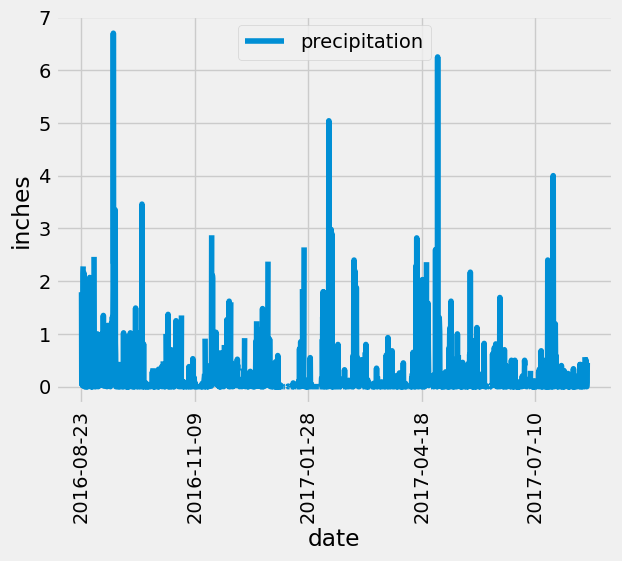

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = Session.query(measurement.date,measurement.prcp).filter(measurement.date >= prev_year) 

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results,columns = ['date', 'precipitation'])
 
# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = 'date', y = 'precipitation',rot=90)
plt.xlabel ('date')
plt.ylabel ('inches')

In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = Session.query(func.count(station.station)).all()
num_of_stations



[(9,)]

In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """
    SELECT
        station,
        count(*) as num_rows
    FROM
        measurement
    GROUP BY
        station
    ORDER BY
        num_rows desc;
"""

df = pd.read_sql(query, con=engine)
df.head()

,station,num_rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [61]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = Session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').\
    all()

#booth 

Text(0.5, 0, 'temperature')

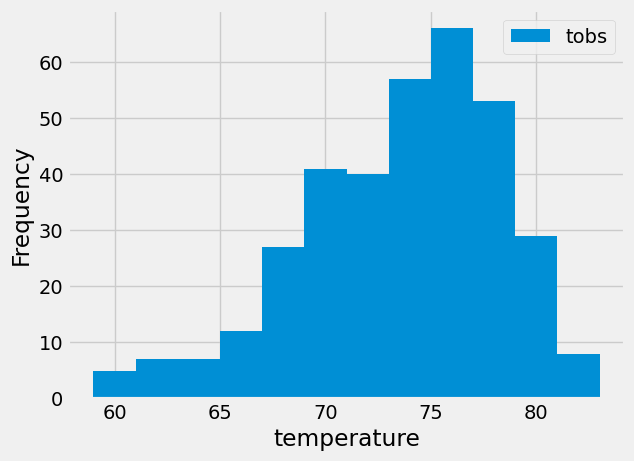

In [69]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = Session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.xlabel("temperature")

# Close Session

In [71]:
# Close Session
Session.close()